<a href="https://colab.research.google.com/github/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Comitês (*Emsemble Learning*)

Comitês são abordagens para combinar várias técnicas de aprendizado supervisionado para construir um único modelo preditivo. Comitês são aplicáveis às tarefas de classificação e de regressão.

Durante o treinamento de um comitê, o objetivo é construir uma coleção de preditores que, juntos, produzem uma predição melhor do que cada um separadamente.


Para ilustrar o funcionamento de modelos comitês, considere a figura abaixo ([fonte](https://)). Nessa figura, temos duas árvores de decisão induzidas. Considere que o problema de classificação (binária) a ser resolvido é predizer ser determinado indivíduo irá gostar (ou não) de um determinado jogo de vídeogames. Para cada um dos indíviduos testados, cada árvore produz um escore (pontuação) juntamente com a classe prevista. O que um modelo comitê faz é combinar os resultados de cada modelo componente para produzir a predição final.

![alt text](https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/twocart.png)


Normalmente, o modelo de comitê resultante tem qualidade preditiva melhor porque diminui a variância ou o viés quando comparado aos modelos componentes (do comitê).

Conforme ilustra a figura a seguir ([fonte](https://ieeexplore.ieee.org/document/1688199)), a fronteira de decisão correspondente a um modelo de comitê pode ser aproximada por meio de uma combinação apropriada dos diferentes preditores (classificadores ou regressores) componentes.

![alt text](https://www.researchgate.net/profile/Robi_Polikar/publication/3432431/figure/fig1/AS:670045000695819@1536762585849/Combining-classifiers-that-are-trained-on-different-subsets-of-the-training-data_W640.jpg)

Um objetivo importante a ser alcançado durante o treinamento de modelo de comitê é atingir a diversidade, no sentido de que cada modelo componente possa complementar um eventual mal desempenho (em termos de qualidade preditiva) dos demais componentes em alguma região do espaço de atributos. Algumas abordagens para se obter diversidade são as seguintes:

* Usar diferentes parâmetros de treinamento para a mesma família de classificadores;

* Usar diferentes tipos de algoritmos de ML para treinar cada modelo componente;

* Usar diferentes conjuntos de atributos para treinar cada modelo componente;

* Manipular o conjunto de treinamento para treinar cada modelo componente com um conjunto de treinamento distinto dos usados nos demais componentes (essa é a abordagem mais comum).

Há duas famílias de algoritmos para aprendizado de modelos de comitês, **Bagging** e **Boosting**, em cada uma das quais podemos encontrar vários algoritmos. A figura a seguir ilustra representantes e características principais de cada um dessas duas famílias.

![alt text](https://miro.medium.com/max/1276/1*8T4HEjzHto_V8PrEFLkd9A.png)

([fonte da figura](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d))

### Bagging

Bagging (termo proveniente de *bootstrap aggregation*) é uma abordagem baseada em comitê que produz $T$ modelos preditivos e combina os resultados desses $T$ modelos para realizar predição para um dado exemplo.

Dado um conjunto de treinamento $X$ com $m$ exemplos, a técnica de bagging funciona de modo iterativo para construir o modelo comitê. Para iteração $t$ ($1 \leq t \leq T$), um conjunto de treinamento de treinamento $X_t$ de tamanho $m$ é gerado a partir de $X$, por meio de um processo conhecido como *amostragem com reposição* (*sampling with replacement*). Cada conjunto de treinamento $X_t$ é denominado uma *amostra de inicialização* (*bootstrap sample*). Dessa forma, a diversidade é obtida no bagging com o uso de diferentes subconjuntos de dados aleatoriamente criados com reposição a partir do único conjunto de dados original.

Repare que, porque a amostragem com reposição é utilizada para produzir cada $X_t$, alguns exemplos em cada conjunto de treinamento gerado podem ocorrer mais de uma vez, enquanto que outras intâncias podem não ser selecionadas para compor $X_t$. 

Para cada $X_t$, um modelo de predição é ajustado. Cada conjunto $X_t$ (*bootstrap sample*) é usado para treinar um modelo preditor $M_t$. Além disso, todos os modelos preditores gerados são do mesmo tipo (i.e., usam a mesma representação). 

No contexto da tarefa de classificação, para predizer a classe de uma instância $\mathbf{x}$, cada modelo $M_t$ é usado para produzir uma resposta. O modelo comitê (composto de todos os $M_t$ classificadores) produz como resposta a classe majoritariamente produzida pelos seus componentes. 
  
O bagging também pode ser aplicado à tarefa de regressão (i.e., para realizar previsão de valores contínuos). Nesse caso, em vez da classe majoritária, o modelo comitê computa o valor médio das previsões produzidas pelos $T$ modelos base.

Vantagens do Bagging:
* Possibilidade de treinamento em paralelo: cada modelo componente pode ser construído de forma independente.

* Adequado quando o algoritmo de ML utilizado gera modelos componentes de baixo viés e de alta variância (i.e., modelos complexos).

#### Passos

Os passos a seguir resumem a técnica de geração de um modelo de comitê por meio da técnica *bagging*:

* Seja $m = |X|$ (quantidade de exemplos de treinamento)

* Para cada iteração $t$:

  * Gerar uma bootstrap sample $X_t$ de tamanho $m$.
  
  * Aplicar o algoritmo de aprendizado sobre $X_t$ para gerar o modelo de predição $M_t$

  * Armazenar o modelo resultante

Predição (classificação) para $\mathbf{x}$:

* Para cada um dos $T$ modelos:

  * Predizer a classe do exemplo $\mathbf{x}$ usando $M_t$

  * Retornar a classe que foi prevista mais vezes (*voting*)

#### Classe BaggingClassifier

No Scikit-Learn, a classe [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) pode ser usada para gerar modelos comitês para classificação por meio da técnica *bagging*. Um dos parâmetros de iniciação dessa classe é `base_estimator`, que indica qual o algoritmo a ser utilizado para gerar cada componente do comitê. A célula de código a seguir ([fonte](https://www.kaggle.com/dillonkoch18/bagging-classifier-titanic-submission) ) ilustra um exemplo de uso dessa classe.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()

rng = 42

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=rng)

# cria o classificador
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1)

# aplica busca em grade para determinar os melhores parâmetros
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 4, 'base_estimator__max_leaf_nodes': 10, 'n_estimators': 40}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Florestas Aleatórias (*Random Forests*)

Random Forests é um caso particular de bagging. Aqui também selecionamos amostras de bootstrap do conjunto de treinamento. No entanto, também são amostrados subconjuntos aleatórios de atributos (*features*) para treinar as árvores individuais. No bagging genérico, um conjunto de dados com todos os atributos contidos em $X$ seria usado para ajustar cada árvore de decisão.

Devido à seleção aleatória de atributos, as árvores são mais independentes (i.e., diferentes) umas das outras do que no bagging, o que contribui para aumentar a diversidade dos modelos componentes.

Efeitos (quando comparamos ao bagging): 

* melhor desempenho preditivo; 
* mais rápido, porque cada árvore aprende a partir de um subconjunto próprio do conjunto de todos os atributos.

#### Classe RandomForestClassifier

No Scikit-Learn, a classe [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) implementa o algoritmo de Florestas Aleatórias. Um dos parâmetros de inicialização dessa classe é `n_estimators`, que indica a quantidade de árvores que devem compor o modelo comitê resultante. O exemplo a seguir ilustra o uso dessa classe sobre o conjunto de dados Iris.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.target_names)

print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
import pandas as pd
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.9333333333333333


In [ ]:
clf.predict([[3, 5, 4, 2]])

array([2])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

Um dos atributos da classe `RandomForestClassifier` é `feature_importances_`, que permite inspecionar qual a contribuição de cada atributo para a força preditiva do modelo gerado (quanto mais importante o atributo, mais alto é o valor correspondente). 

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal width (cm)     0.438652
petal length (cm)    0.438511
sepal length (cm)    0.092768
sepal width (cm)     0.030069
dtype: float64

O código a seguir gera uma representação gráfica das importâncias de cada atributo do conjunto Iris sobre o modelo comitê gerado.

No handles with labels found to put in legend.


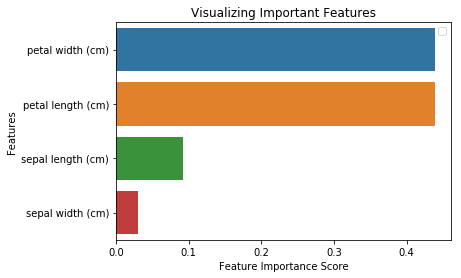

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Boosting

Na técnica de *boosting*, o treinamento do modelo comitê é realizado de forma **sequencial**: em cada passo, o algoritmo tenta adicionar um novo modelo componente que é melhor em regiões (do espaço de atributos) nas quais os modelos anteriormente adicionados ao comitê erraram. Para isso, exemplos que foram incorretamente classificados pelos componentes já ajustados possuem maior probabilidade de serem selecionados para ajustar novos componentes, conforme ilustra a figura a seguir ([fonte](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)).
![alt text](https://quantdare.com/wp-content/uploads/2016/04/bb2-800x307.png)
Algoritmos de *boosting* são adequados para compor modelos gerados por algoritmos que produzem modelos de viés alto e de baixa variância.

A figura a seguir ([fonte](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)) ilustra de forma esquemática a diferença entre as abordagens *bagging* e *boosting*.
![alt text](https://quantdare.com/wp-content/uploads/2016/04/bb3-800x307.png)



### Aprendizes: fracos e fortes

Um **aprendiz fraco** (*weak learner*) é definido como um classificador que é apenas ligeiramente correlacionado com a classificação verdadeira. Ou seja, um aprendiz fraco pode rotular exemplos com acurácia igual a $1/2 + \alpha$, onde $\alpha$ é um valor pequeno e positivo. Isso significa que em um weak learner, o desempenho em qualquer conjunto de treinamento é ligeiramente melhor que a previsão ao acaso.

Em contraste, um **aprendiz forte** (*strong learner*) é um classificador que é arbitrariamente bem correlacionado com a classificação verdadeira.


### AdaBoost

O AdaBoost é uma das primeiros métodos de boosting. Este método mantém uma lista de pesos, um para cada um dos $m$ exemplos do conjunto de treinamento.

1. Iniciar pesos com valores uniformes ($1/m$)
2. Iterar:
  * Aplicar aprendiz $L$ aos exemplos ponderados
  * Aumentar pesos dos exemplos classificados incorretamente por $L$.
3. Combinar modelos por votação ponderada

Em cada iteração (passo 2 acima), os pesos dos exemplos são alterados de tal forma a fazer com que o próximo aprendiz priorize os exemplos que o aprendiz anterior classificou incorretamente.


### Class AdaBoostClassifier

No Scikit-Learn, a classe [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) implementa o algoritmo AdaBoost. As células a seguir ilustram o uso dessa classe.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Realiza a carga do dados
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [ ]:
# Define as matrizes de dados e alvo
X = dataset[:,0:8]
y = dataset[:,8]
print(X.shape)

(768, 8)


In [ ]:
# Divide os dados para treinamento e teste
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)  

print(clf.feature_importances_ )

y_pred = clf.predict(X)

print(confusion_matrix(y, y_pred))

[0.06 0.23 0.06 0.04 0.11 0.16 0.26 0.08]
[[445  55]
 [ 69 199]]


### Gradient boosting

A abordagem mais popular de boosting é o Gradient Boosting. Outros nomes para este mesmo método: *multiple additive regression trees*, *stochastic gradient boosting*, *gradient boosting machines*.

### XGBoost

O [XGBoost](https://xgboost.ai/) (*Extreme Gradient Boosting*) é a implementação de gradient boosting mais utilizada atualmente. Essa implementação foi desenvolvida por [Tianqi Chen](https://tqchen.com).

O modelo que o XGBoost produz é um comitê em que cada componente é uma árvore de decisão. Sendo assim, a representação usada no modelo resultante no XGBoost é a mesma usada no método *Random Forests*. A diferença está na forma pela qual o comitê de árvores é construído durante o aprendizado. O XGBoost define uma função objetivo a ser otimizada durante o aprendizado, por meio do método de otimização [Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method), que é similar ao método [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent). 

Suponha que $f_t$ ($1 \leq t \leq T$) representa uma das $T$ árvores componentes de um modelo comitê produzido pelo XGBoost. Cada árvore é um elemento do conjunto $\mathcal{F}$, o espaço de árvores compatíveis com o conjunto de treinamento utilizado, $f_t \in \mathcal{F}$. O escore produzido pelo comitê de árvores para o exemplo $x^{(i)}$ é dado pela fórmula a seguir:

$$
\hat{y}^{(i)} = \sum_{k=1}^T f_t(x^{(i)})
$$

Durante o aprendizado, o XGBoost procura minimizar a seguinte função objetivo:

$$
\text{obj} = \sum_{t=1}^m l(y^{(i)}, \hat{y}^{(i)}) + \sum_{i=1}^T\Omega(f_t)
$$

Otimizar todas as árvores do comitê de uma única vez é intratável computacionalmente. Por conta disso é que o XGBoost usa um procecimento de otmização aditivo, no qual ocorre a otimização de uma árvore por vez.
$$
\begin{split}
\hat{y}_0^{(i)} &= 0\\
\hat{y}_1^{(i)} &= f_1(x^{(i)}) = \hat{y}_0^{(i)} + f_1(x^{(i)})\\
\hat{y}_2^{(i)} &= f_1(x^{(i)}) + f_2(x^{(i)})= \hat{y}_1^{(i)} + f_2(x^{(i)})\\
&\dots\\
\hat{y}_t^{(i)} &= \sum_{k=1}^t f_k(x^{(i)})= \hat{y}_{t-1}^{(i)} + f_t(x^{(i)})
\end{split}
$$

É possível provar (veja detalhes no artigo fonte) que a função objetivo a ser otimizada para selecionar a $t$-ésima árvore é a seguinte:

$$
\operatorname{obj}_t = \sum_{i=1}^m [g_i f_t(x^{(i)}) + \frac{1}{2} h_i f_t^2(x^{(i)})] + \Omega(f_t)
$$

Na expressão acima, $g_i$ e $h_i$ são as derivadas parciais de primeira e de segunda ordem da função $l$ com relação a $\hat{y}_{i-1}^{(i)}$.

$$
\begin{split}
g_i &= \partial_{\hat{y}^{(t)}_{t-1}} l(y^{(i)}, \hat{y}^{(i)}_{t-1})\\
h_i &= \partial_{\hat{y}^{(i)}_{t-1}}^2 l(y^{(i)}, \hat{y}^{(i)}_{t-1})
\end{split}
$$

Há duas classes classes empacotadoras para utilizar a implementação fornecida pelo [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) com o Scikit-Learn: `XGBClassifier` e `XGBRegressor`.

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Realiza a carga do dados
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [ ]:
# Define as matrizes de dados e alvo
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
# Divide os dados para treinamento e teste
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
# Ajusta o modelo
model = XGBClassifier()
print(model)
model.fit(X_train, 
          y_train, 
          eval_metric = "logloss", 
          verbose = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Avalia a acurária do modelo preditivo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


#### Outros exemplos

Os exemplos a seguir ([fonte](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn)) ilustram diferentes usos das classes `XGBClassifier` e `XGBRegressor`.

##### Regressão

O exemplo a seguir ilustra o uso do XGBoost para a tarefa de regressão.

In [ ]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [ ]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))

36.271203581682585


In [ ]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

##### Classificação binária

In [ ]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[212   0]
 [  0 357]]


##### Classificação multiclasses

In [ ]:
wine = load_wine()

X = wine.data
y = wine.target

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


##### Validação cruzada

In [ ]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

Scores: [55.30444573 55.59151472 63.44642064 57.82986083 58.71808276]
Mean: 58.178
Std: 2.937



## Bagging x Boosting
* Bagging  e Random Forests são algoritmos que visam reduzir a complexidade de modelos que se sobreajustam aos dados de treinamento. 
** Bagging pode degradar o desempenho de algoritmos estáveis (por exemplo, k-NN), porque conjuntos de treinamento efetivamente menores são usados para treinar cada classificador.
* Em contraste, boosting é uma abordagem para aumentar a complexidade de modelos que sofrem de alto viés, i.e., que se subajustam aos dados de treinamento.
